# Example of `timeDelay` Module

In [1]:
from time_delay import timeDelay

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_context('talk')

## Load File

In [3]:
fname = './data/DomeTest109.aiff'
td = timeDelay(fname)

In [4]:
print(f'Audio File duration: {td.duration} seconds')

Audio File duration: 59.93835416666666 seconds


### Dice Audio Data
The total duration of the file is big comapred to the duration of the pulses. To facilitate the processing, we will divide the audio data into smaller segments with periods of 250ms.

<Axes: title={'center': 'Dice 20 - Time 5.125 ms'}, xlabel='Time (ms)'>

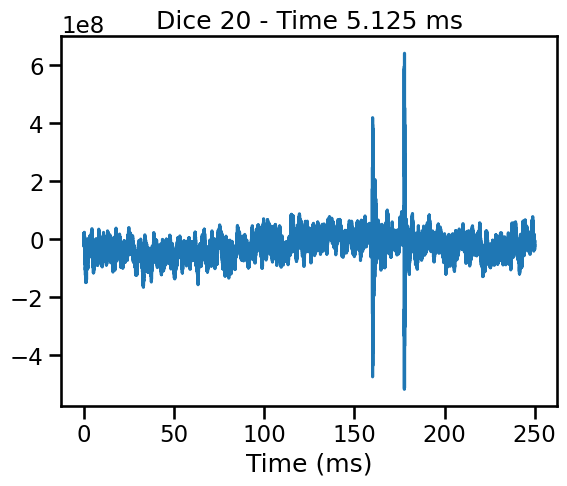

In [5]:
td.plot_dice(20)

### Decompose Signal
The audio data has noise from the environment. To facilitate the processing, we will decompose the signal into its main components. The pulse should be the highest component.

The First channel operates in 42.51 kHz
The second channel operates in 20.08 kHz
The Third channel operates in 9.49 kHz


/Users/esteves/Documents/github/AcousticsBatping/time_delay.py:202: RuntimeWarning: All-NaN slice encountered
  max_values = np.nanmax(np.abs(spec), axis=1)


<Axes: title={'center': 'Decomposed signal in the band 1-90 kHz - Slice 2'}, xlabel='Time (ms)'>

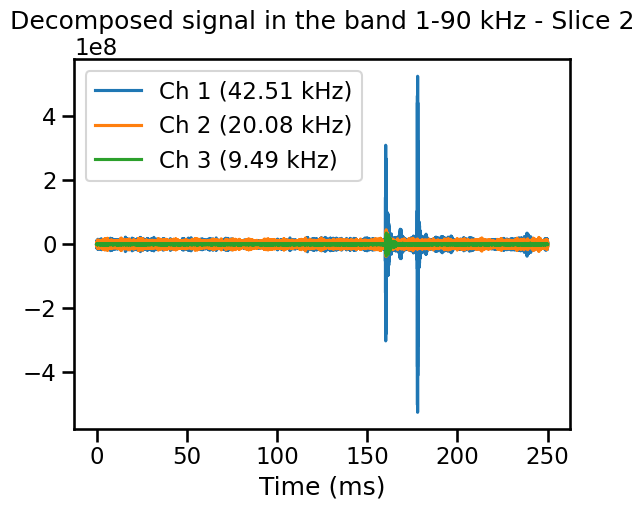

In [6]:
td.plot_dice_decompose(20, lo=1, hi=90)

## Compute Time Delay

For this measurement we will find the peaks of each pulse. After indetifying the peaks, we will calculate the time delay between the pulses of the two signals using the initial time. 


The initial time is the time when the peak height is 1/e.

In [7]:
td.compute_time_delay_over_dices(lo=1, hi=90, min_delay=15, max_delay=250)

158.5615579328951 160.5615579328951


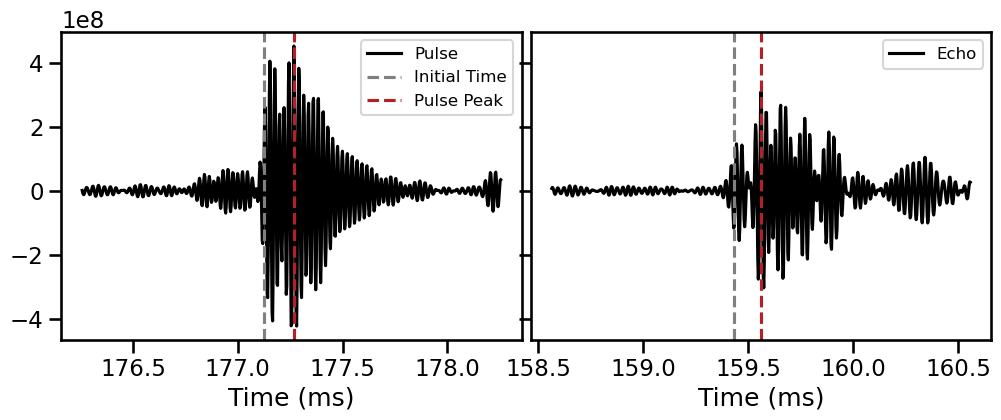

In [8]:
td.plot_dice_pulse(5)

In [9]:
# The outputs are 
tdelays = td.tdelay
time = td.times

In [10]:
td.peaks[5]

array([61271, 68070, 91686])

### Looking at the results

In [11]:
def mask_outliers(x, nth=3):
    std = np.nanstd(x)
    xm = np.nanmedian(x)
    return (x < xm - nth*std) | (x > xm + nth*std)

def count_outliers(x):
    return x[mask_outliers(x)].size


In [12]:
outliers = mask_outliers(tdelays)
print('Number of Outliers:', count_outliers(tdelays))
print('Outliers:', list(np.round(tdelays[outliers],2)))

Number of Outliers: 1
Outliers: [16.71]


Text(0, 0.5, 'Time delay (ms)')

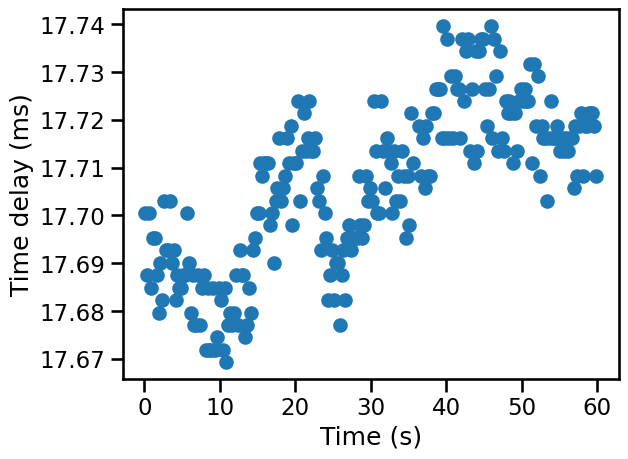

In [13]:
plt.scatter(time[~outliers], tdelays[~outliers])
plt.xlabel('Time (s)')
plt.ylabel('Time delay (ms)')

# Second Audio File

In [14]:
fname = './data/DomeTest102.aiff'
td = timeDelay(fname)

In [15]:
td.compute_time_delay_over_dices(lo=1, hi=90, min_delay=15, max_delay=250)

/Users/esteves/Documents/github/AcousticsBatping/time_delay.py:202: RuntimeWarning: All-NaN slice encountered
  max_values = np.nanmax(np.abs(spec), axis=1)


Text(0, 0.5, 'Time delay (ms)')

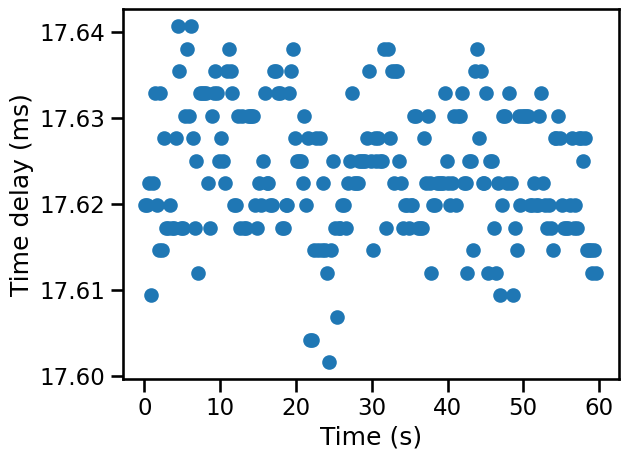

In [16]:
# The outputs are 
tdelays = td.tdelay
time = td.times
outliers = mask_outliers(tdelays)
plt.scatter(time[~outliers], tdelays[~outliers])
plt.xlabel('Time (s)')
plt.ylabel('Time delay (ms)')

In [17]:
outliers = mask_outliers(tdelays)
print('Number of Outliers:', count_outliers(tdelays))
print('Outliers:', list(np.round(tdelays[outliers],2)))

Number of Outliers: 0
Outliers: []


126.8502901071886 128.85029010718858


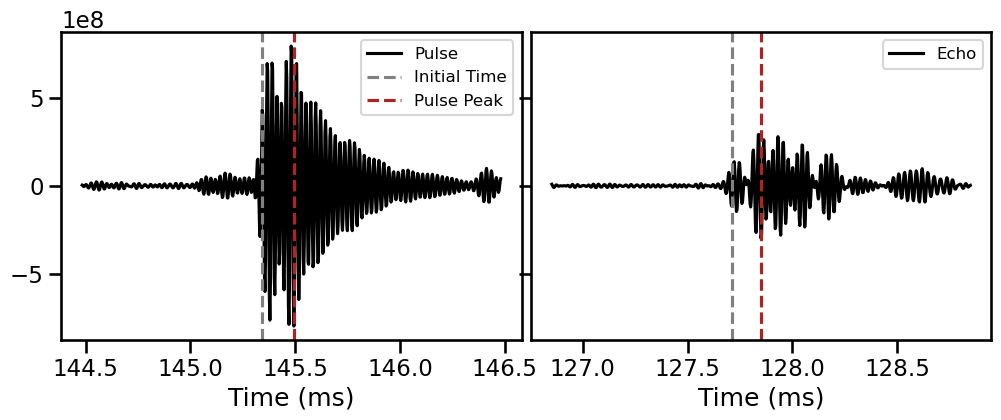

In [18]:
td.plot_dice_pulse(5)